In [79]:
# pip install spacy 
# python -m spacy download en_core_web_md

import spacy

In [ ]:
nlp = spacy.load('en_core_web_md')

In [248]:
from pyalex import Works

oa_id_list = "W2130354913"

def extract_abstracs(oa_id_list):
    """ extracts abstracts for a couple of test references """
    refs = Works().filter(openalex=oa_id_list).get()
    referenced_works = [w["referenced_works"] for w in refs]
    refs = [refs[0]["id"]] + referenced_works[0]
    #refs = refs[0] 
    
    second_layer = []
    for ref in range(0, len(refs), 25):
        subset = "|".join(refs[ref : ref + 25])
        second_layer.append(Works().filter(openalex=subset).get())
    all = [entry for lists in second_layer for entry in lists]
    return [{"id" : w["id"].split("/")[-1], "abstract": w["abstract"]} for w in all] 

abstracts = extract_abstracs(oa_id_list)
abstracts[5:11] 

[{'id': 'W1992496496',
  'abstract': 'This study investigated the informal networks of white and minority managers. Minority managers had more racially heterogeneous and fewer intimate network relationships. Within the minority group, ...'},
 {'id': 'W1967272740',
  'abstract': 'Legitimacy affects returns to social capital. I begin with the network structure of social capital, explaining the information and control benefits of structural holes. The holes in a network are enterpreneurial opportunities to add value, and persons rich in such opportunities are expected to be more successful than their peers. Accumulating empirical research supports the prediction. However, women here pose a puzzle. The entrepreneurial networks linked to early promotion for senior men do not work for women. Solving the gender puzzle is an occasion to see how network models of social capital can be used to identify people not accepted as legitimate members of a population, and to describe how such people get

In [256]:
def abstract_nlp_stopwords(abstracts):
    for i in abstracts:
        if i['abstract'] is not None:
            i['abstract'] = nlp(i["abstract"]) 
            i['abstract'] = " ".join([token.text for token in i['abstract'] if not token.is_stop]) 
            i['abstract'] = nlp(i["abstract"]) 
    return abstracts

abstracts_nlp = abstract_nlp_stopwords(abstracts)
abstracts_nlp[5:11] 

[{'id': 'W1992496496',
  'abstract': study investigated informal networks white minority managers . Minority managers racially heterogeneous fewer intimate network relationships . minority group , ...},
 {'id': 'W1967272740',
  'abstract': Legitimacy affects returns social capital . begin network structure social capital , explaining information control benefits structural holes . holes network enterpreneurial opportunities add value , persons rich opportunities expected successful peers . Accumulating empirical research supports prediction . , women pose puzzle . entrepreneurial networks linked early promotion senior men work women . Solving gender puzzle occasion network models social capital identify people accepted legitimate members population , describe people access social capital borrowing network strategic partner .},
 {'id': 'W2009294174',
  'abstract': article combines studies transitivity homophily empirical analysis personal network integration . national sample individual

In [ ]:
# # remove stopwords 
# abstracts_rmstop = []
# for element in abstracts_nlp[5:15]:
#     print(element["abstract"])
#     abstracts_rmstop.append([token.text for token in element["abstract"] if not token.is_stop])
#    # abstracts_rmstop.append(" ".join([token.text for token in token if not token.is_stop]))
# #abstracts_rmstop[1:10] 
# abstracts_rmstop 

In [263]:
similarities = [abstracts[0]["abstract"].similarity(i["abstract"]) for i in abstracts_nlp if i["abstract"] is not None]

[1.0,
 0.9359206301381238,
 0.9623202652684273,
 0.9328678915346575,
 0.934770202786281,
 0.8864468813943054,
 0.9091024970252911,
 0.9142593280193054,
 0.9158132132660801,
 0.9269727860260786,
 0.9636484971272957,
 0.905907055629168,
 0.9210499827919849,
 0.9625897401343297,
 0.9223159629709784,
 0.926435668724007,
 0.9063950596598817,
 0.8766395081142505,
 0.9133743829231248,
 0.9475631346169366,
 0.9612513651800692,
 0.9359961468321891,
 0.9632283114681653,
 0.9268780385886565,
 0.9750338320822599,
 0.9453358954499211,
 0.896246795631611,
 0.9158198569586894,
 0.8995491025419564,
 0.941703937592469,
 0.9104081059474699,
 0.8622528566654688,
 0.9187565855056784,
 0.9380702004211026,
 0.8536770211193032,
 0.9477763422780789,
 0.43449365909807847,
 0.9316828249021427,
 0.9472728233867296,
 0.8712436455286169,
 0.38281542890734815,
 0.9368137064303573,
 0.9069118633669673,
 0.9531804058503536,
 0.8295317282013036,
 0.9577431175230843,
 0.8921837458053984,
 0.9313255262436323,
 0.9696666

<Axes: ylabel='Count'>

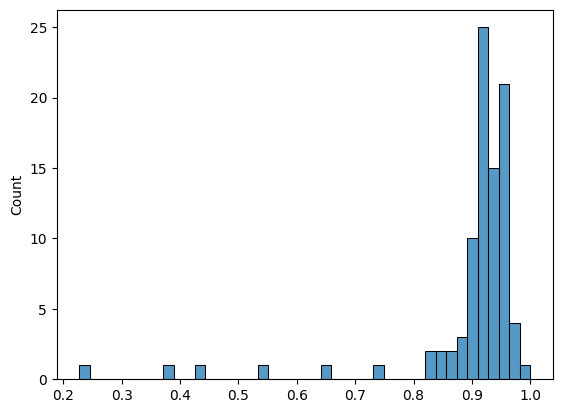

In [266]:
import seaborn as sns
sns.histplot(similarities)

In [284]:
abstracts_nlp[0:10]

print(sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:10])

abstracts_nlp[50]

[0, 24, 50, 48, 73, 10, 22, 13, 2, 20]


{'id': 'W2136048895',
 'abstract': " characteristics play role choice spouse , sociologists examined endogamy homogamy respect race / ethnicity , religion , socioeconomic status .... summarize empirical research answering questions : ( ) extent groups endogamous groups differ respect ? ( b ) endogamy changed time ? ( c ) factors related endogamy ? ( d ) dimensions partner choice coincide ? [ ] discuss strengths weaknesses past research . "}

In [118]:
abstracts_rmstop[similarities.index(min(similarities))] 

'partir des donnees de 1985 , les AA . etudient dans un premier temps les facteurs qui soulignent la propension chez les Americains maries inclure leur epouse comme membre de leurs reseaux de discussion et dans un deuxieme temps les facteurs qui montrent leur propension nommer leur epouse comme la premiere , et probablement la plus importante , personne de leur reseau'